# EDA. Part II.2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot 
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
import kaleido
import plotly.io as pio
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.scale = 1.2

In [3]:
df = pd.read_csv("C:\\Users\\user\\OneDrive\\Рабочий стол\\chistoe.csv")
df = df.drop('Unnamed: 0',axis=1)
df.columns = map(str.capitalize,df.columns)

C:\Users\user\AppData\Local\Temp\ipykernel_10836\1940763671.py:1: DtypeWarning:

Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.



> ### Для начала, давайте посмотрим на то, как распределены виды событий(конфликтов) в различных типах насилия

In [4]:
dl = df[df['Disorder_type']=='Political violence']
ak = pd.DataFrame(dl['Event_type'].value_counts())
ak = ak.reset_index(drop=False)
ak = ak.rename(columns = {'index':'Event_type','Event_type':'Count'})

- ### Political violence
    - Круговая диаграмма интерактивная:)

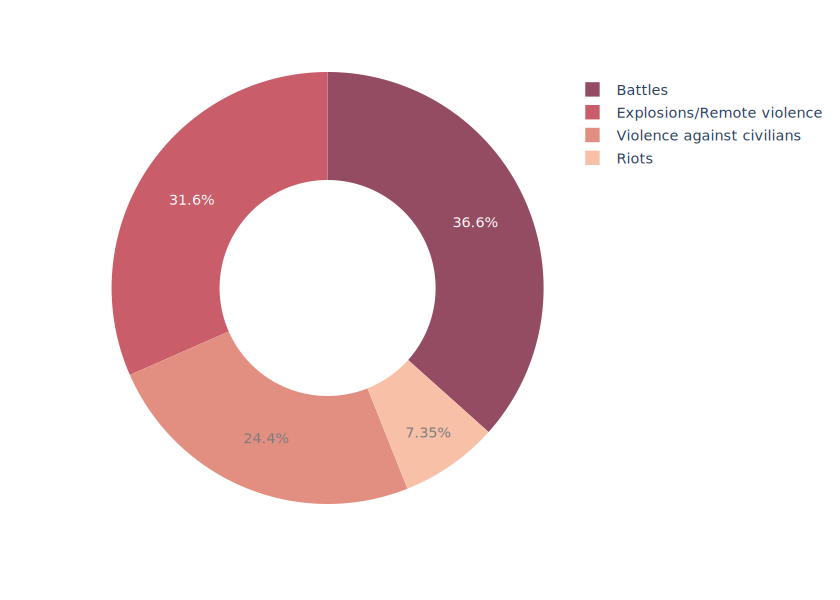

In [5]:
fig = px.pie(ak, values="Count", names="Event_type",
             color_discrete_sequence=px.colors.sequential.RdBu,
             opacity=0.7, hole=0.5)
fig.show()

- ### Demonstrations

In [6]:
dm = df[df['Disorder_type']=='Demonstrations']
bk = pd.DataFrame(dm['Event_type'].value_counts())
bk = bk.reset_index(drop=False)
bk = bk.rename(columns = {'index':'Event_type','Event_type':'Count'})

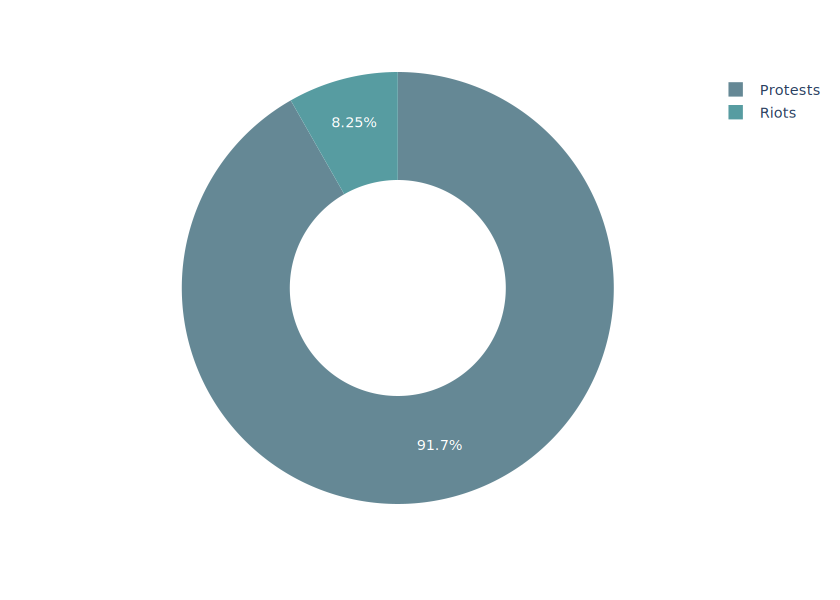

In [7]:
fig = px.pie(bk, values="Count", names="Event_type",
             color_discrete_sequence=px.colors.sequential.Aggrnyl,
             opacity=0.7, hole=0.5)
fig.show()

- ### Strategic developments

In [8]:
ds = df[df['Disorder_type']=='Strategic developments']
ck = pd.DataFrame(ds['Event_type'].value_counts())
ck = ck.reset_index(drop=False)
ck = ck.rename(columns = {'index':'Event_type','Event_type':'Count'})

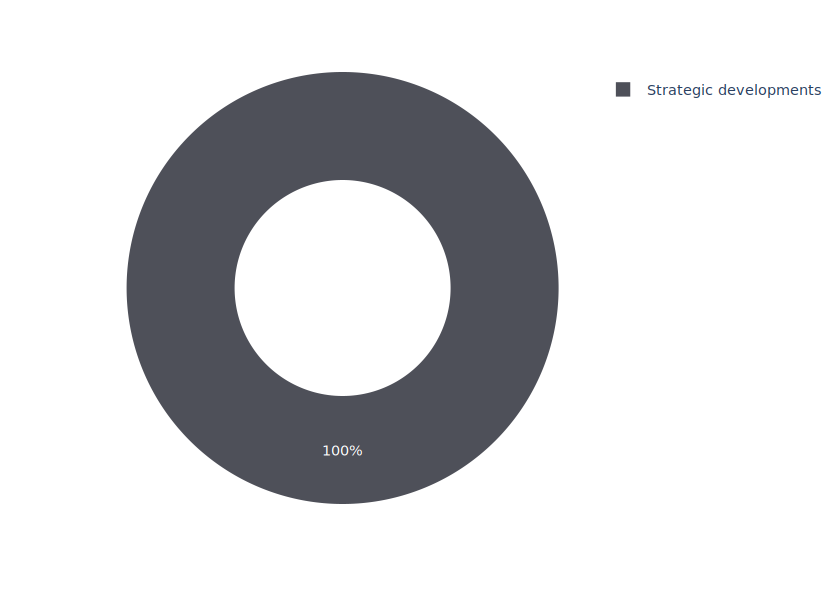

In [9]:
fig = px.pie(ck, values="Count", names="Event_type",
             color_discrete_sequence=px.colors.sequential.ice,
             opacity=0.7, hole=0.5)
fig.show()

- ### Political violence; Demonstrations

In [10]:
pl = df[df['Disorder_type']=='Political violence; Demonstrations']
dk = pd.DataFrame(pl['Event_type'].value_counts())
dk = dk.reset_index(drop=False)
dk = dk.rename(columns = {'index':'Event_type','Event_type':'Count'})

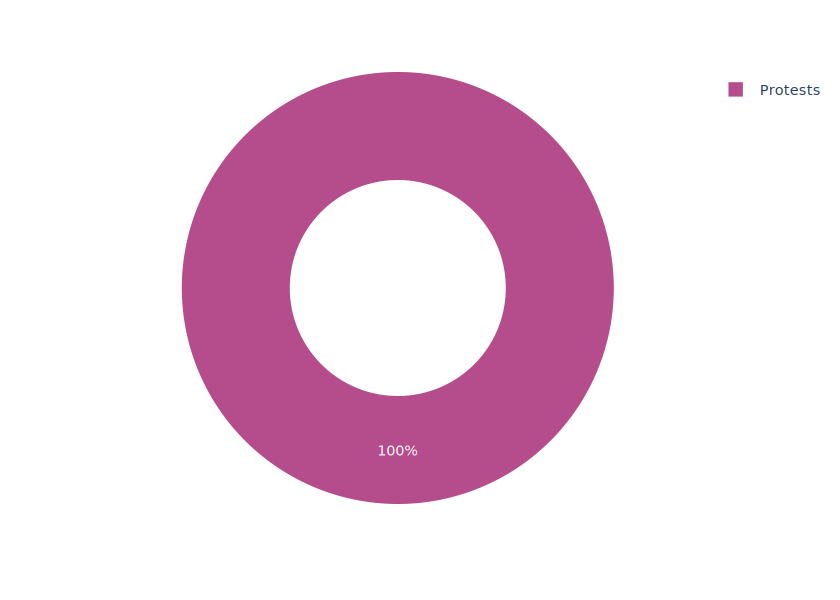

In [11]:
fig = px.pie(dk, values="Count", names="Event_type",
             color_discrete_sequence=px.colors.sequential.Rainbow,
             opacity=0.7, hole=0.5)
fig.show()

### Получаем довольно интересный результат: Политические беспорядки включают в себя сразу несколько типов событий, для демонстраций скорее характерны протесты (что логично), а для оставшихся видов - по сути, они же сами

> ### Можно также посмотреть на то, какими вспомогательными типами сопровождается тот или иной тип конфликта/насилия и подобное. Но давайте всё-таки посмотрим на то, как какие-либо категориальные переменные связаны с нашими целевыми переменными.

## <u>*Classification*</u>

> #### Эта переменная отвечает за классификацию доходов.

#### Давайте посмотрим на зависимость типов насилия от уровня доходов

In [12]:
al = df[['Classification','Disorder_type']].groupby('Disorder_type')
al = al['Classification'].value_counts()
al = pd.DataFrame(al)
al = al.rename(columns = {'Classification':'Count'})

- ### Political violence

In [13]:
al = al.reset_index(drop=False)
pol_v = al[al['Disorder_type']=='Political violence']

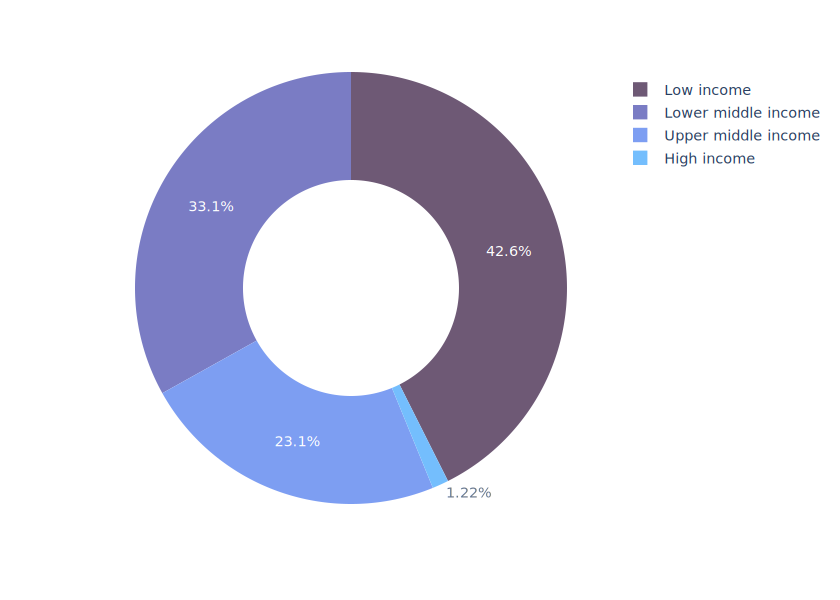

In [14]:
fig = px.pie(pol_v, values="Count", names="Classification",
             color_discrete_sequence=px.colors.sequential.Turbo,
             opacity=0.7, hole=0.5)
fig.show()

- ### Demonstrations

In [15]:
dem = al[al['Disorder_type']=='Demonstrations']

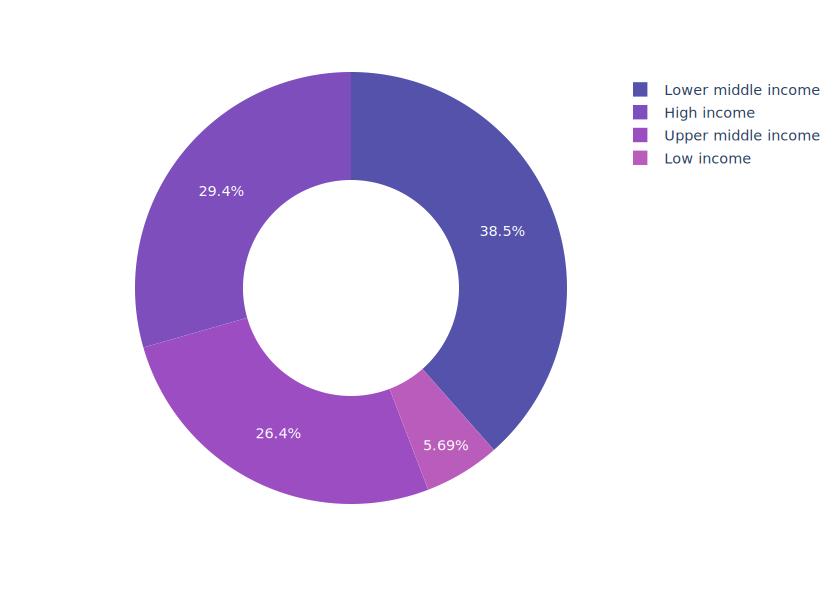

In [16]:
fig = px.pie(dem, values="Count", names="Classification",
             color_discrete_sequence=px.colors.sequential.Plasma,
             opacity=0.7, hole=0.5)
fig.show()

- ### Strategic developments

In [17]:
std = al[al['Disorder_type']=='Strategic developments']

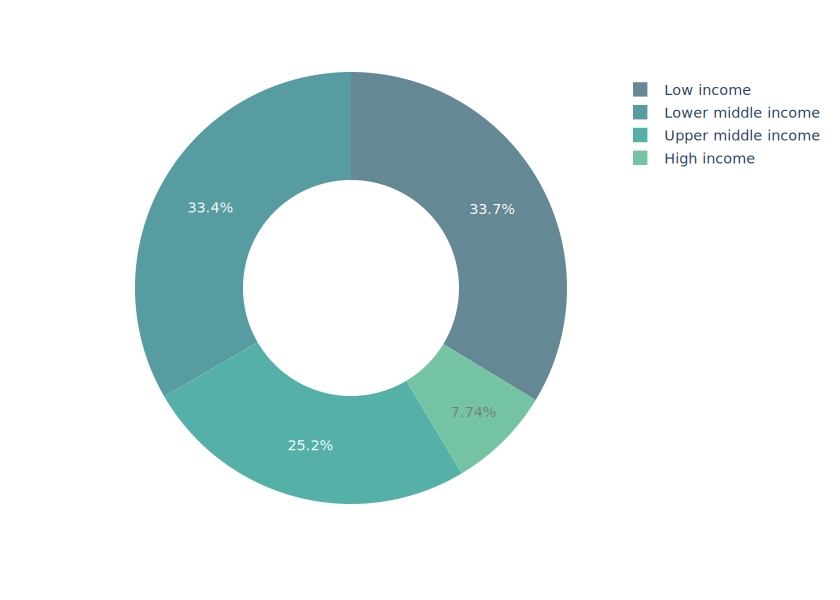

In [18]:
fig = px.pie(std, values="Count", names="Classification",
             color_discrete_sequence=px.colors.sequential.Aggrnyl,
             opacity=0.7, hole=0.5)
fig.show()

- ### Political violence; Demonstrations

In [19]:
pvd = al[al['Disorder_type']=='Political violence; Demonstrations']

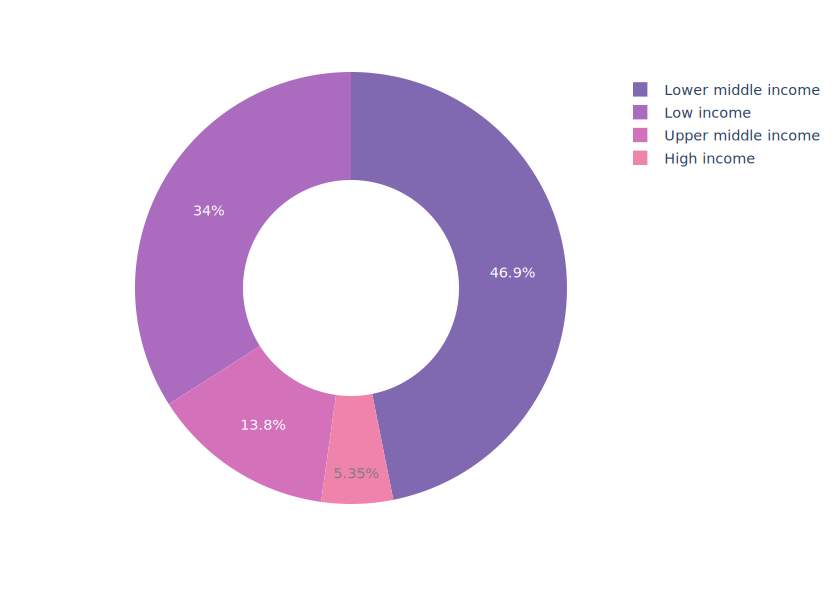

In [20]:
fig = px.pie(pvd, values="Count", names="Classification",
             color_discrete_sequence=px.colors.sequential.Agsunset,
             opacity=0.7, hole=0.5)
fig.show()

### А теперь немного выводов:
#### __1. Political violence__

   - чаще всего происходят в странах с Low income и Lower middle income 
   
#### __2. Demonstrations__

   - на удивление, подобного рода конфликты происходят не в самых бедных странах, наибольший процент суммарно в странах с High income и Upper middle income
   
#### __3.Strategic developments__

   - чаще всего происходят в странах с Low income и Lower middle income
   
#### __4.Political violence; Demonstrations__

   - почти половина подобного рода конфликтов происходит в странах с Lower middle income

> ### Смотреть, с точки зрения визуализации, на целевую переменную "Index" не имеет смысла: слишком много значений, поэтому дальше проведём именно числовой анализ